In [1]:
import pandas as pd
from pathlib import Path
from functools import reduce

In [2]:
def get_score(file_name):
    with open(file_name, 'r') as f:
        lines = f.readlines()[4: -2]
        lines = filter(lambda line: line[0] == 'T', lines)
        score = [list(line.split()) for line in lines]
        model_name = [l[0] for l in score]
        global_score = [l[1] for l in score]
        df = pd.DataFrame({'score': global_score}, index=model_name)
    return df

In [3]:
def get_group_score(group_num: str, group_name: str, stage=2):
    score_dir = '../predictions/QA/QA2'
    df_array = []
    for target in Path(score_dir).glob('*'):
        target_file = target / (target.stem + 'QA' + str(group_num) + '_' + str(stage))
        try:
            df_array.append(get_score(target_file))
        except:
            pass
    df = pd.concat(df_array).rename({'score': group_name}, axis=1)
    return df

In [4]:
def get_qa_stage_df(stage):
    proposed_df = get_group_score('074', '3DCNN_prof', stage=stage)
    proq3d_df = get_group_score('339', 'ProQ3D', stage=stage)
    graph_df = get_group_score('210', 'GraphQA', stage=stage)
    angle_df = get_group_score('391', 'angleQA', stage=stage)
    proq2_df = get_group_score('067', 'ProQ2', stage=stage)
    davis_df = get_group_score('433', 'DAVIS-EMAconsensus', stage=stage)
    baker_rosetta_df = get_group_score('209', 'BAKER-ROSETTASERVER', stage=stage)
    baker_exp_df = get_group_score('403', 'BAKER-experimental', stage=stage)
    p3de_df = get_group_score('257', 'P3De', stage=stage)
    modfold8_df = get_group_score('167', 'ModFOLD8', stage=stage)
    tfold_idt_df = get_group_score('351', 'tFold-IDT', stage=stage)
    vorocnn_gemme_df = get_group_score('406', 'VoroCNN-GEMME', stage=stage)
    vorocnn_gdt_df = get_group_score('153', 'VoroCNN-GDT', stage=stage)
    deeppotential_df = get_group_score('024', 'DeepPotential', stage=stage)
    ornate_df = get_group_score('346', 'Ornate', stage=stage)
    sbrod_df = get_group_score('085', 'SBROD', stage=stage)
    df = pd.concat([proposed_df, proq3d_df, graph_df, angle_df, proq2_df, davis_df, baker_rosetta_df, baker_exp_df, p3de_df, modfold8_df, tfold_idt_df, vorocnn_gdt_df, vorocnn_gemme_df, deeppotential_df, ornate_df, sbrod_df], axis=1)
    return df

In [5]:
df = get_qa_stage_df(stage=2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12444 entries, T1024TS075_1 to T1101TS337_4
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   3DCNN_prof           12444 non-null  object
 1   ProQ3D               12361 non-null  object
 2   GraphQA              11094 non-null  object
 3   angleQA              12361 non-null  object
 4   ProQ2                11913 non-null  object
 5   DAVIS-EMAconsensus   12361 non-null  object
 6   BAKER-ROSETTASERVER  12441 non-null  object
 7   BAKER-experimental   12441 non-null  object
 8   P3De                 12360 non-null  object
 9   ModFOLD8             12443 non-null  object
 10  tFold-IDT            12361 non-null  object
 11  VoroCNN-GDT          12354 non-null  object
 12  VoroCNN-GEMME        12354 non-null  object
 13  DeepPotential        12206 non-null  object
 14  Ornate               12360 non-null  object
 15  SBROD                12361 non-null  obj

In [6]:
result_df = pd.read_csv('../data/casp14_res_table.csv', index_col=0)

In [7]:
df_stage2 = pd.merge(df, result_df, left_index=True, right_index=True, how='left')
df_stage2['target'] = [index.split('TS')[0] for index in df_stage2.index]
df_stage2.to_csv('../data/casp14_stage2.csv')

In [8]:
# get stage1
df = get_qa_stage_df(stage=1)
df_stage1 = pd.merge(df, result_df, left_index=True, right_index=True, how='left')
df_stage1['target'] = [index.split('TS')[0] for index in df_stage1.index]
df_stage1.to_csv('../data/casp14_stage1.csv')

In [9]:
df_stage1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1660 entries, T1024TS033_4 to T1101TS063_3
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   3DCNN_prof           1660 non-null   object 
 1   ProQ3D               1577 non-null   object 
 2   GraphQA              1440 non-null   object 
 3   angleQA              1577 non-null   object 
 4   ProQ2                1442 non-null   object 
 5   DAVIS-EMAconsensus   1577 non-null   object 
 6   BAKER-ROSETTASERVER  1643 non-null   object 
 7   BAKER-experimental   1643 non-null   object 
 8   P3De                 1577 non-null   object 
 9   ModFOLD8             1660 non-null   object 
 10  tFold-IDT            1577 non-null   object 
 11  VoroCNN-GDT          1573 non-null   object 
 12  VoroCNN-GEMME        1573 non-null   object 
 13  DeepPotential        1501 non-null   object 
 14  Ornate               1577 non-null   object 
 15  SBROD                157

In [10]:
df_stage2_dropna = df_stage2.dropna(subset=['GDT_TS'])

In [11]:
mqa_target = [target for target, _ in df_stage2_dropna.groupby('target')]

In [12]:
mqa_target

['T1024',
 'T1025',
 'T1026',
 'T1027',
 'T1028',
 'T1029',
 'T1030',
 'T1031',
 'T1032',
 'T1033',
 'T1034',
 'T1035',
 'T1036s1',
 'T1037',
 'T1038',
 'T1039',
 'T1040',
 'T1041',
 'T1042',
 'T1043',
 'T1045s1',
 'T1045s2',
 'T1046s1',
 'T1046s2',
 'T1047s1',
 'T1047s2',
 'T1049',
 'T1050',
 'T1052',
 'T1053',
 'T1054',
 'T1055',
 'T1056',
 'T1057',
 'T1058',
 'T1060s2',
 'T1060s3',
 'T1061',
 'T1064',
 'T1065s1',
 'T1065s2',
 'T1067',
 'T1068',
 'T1070',
 'T1073',
 'T1074',
 'T1076',
 'T1078',
 'T1079',
 'T1080',
 'T1082',
 'T1083',
 'T1084',
 'T1085',
 'T1086',
 'T1087',
 'T1088',
 'T1089',
 'T1090',
 'T1091',
 'T1092',
 'T1093',
 'T1094',
 'T1095',
 'T1096',
 'T1099',
 'T1100',
 'T1101']

In [13]:
df_stage2_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10169 entries, T1024TS075_1 to T1101TS337_4
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   3DCNN_prof           10169 non-null  object 
 1   ProQ3D               10102 non-null  object 
 2   GraphQA              9425 non-null   object 
 3   angleQA              10101 non-null  object 
 4   ProQ2                9674 non-null   object 
 5   DAVIS-EMAconsensus   10101 non-null  object 
 6   BAKER-ROSETTASERVER  10166 non-null  object 
 7   BAKER-experimental   10166 non-null  object 
 8   P3De                 10101 non-null  object 
 9   ModFOLD8             10168 non-null  object 
 10  tFold-IDT            10101 non-null  object 
 11  VoroCNN-GDT          10094 non-null  object 
 12  VoroCNN-GEMME        10094 non-null  object 
 13  DeepPotential        9947 non-null   object 
 14  Ornate               10100 non-null  object 
 15  SBROD                10

In [14]:
df_stage2_fil = df_stage2_dropna.groupby('target').filter(lambda group: group['GDT_TS'].max() > 40)
df_stage2_fil

,3DCNN_prof,ProQ3D,GraphQA,angleQA,ProQ2,DAVIS-EMAconsensus,BAKER-ROSETTASERVER,BAKER-experimental,P3De,ModFOLD8,...,TMscore,Dali(raw),FlexE,QSE,CAD_SS,MolPrb_clash,MolPrb_rotout,MolPrb_ramout,MolPrb_ramfv,target
T1024TS075_1,0.66066,0.586251,0.649,0.467,0.598,0.64812,0.6782,0.6175,0.567581,0.581992,...,0.71,1371.2,7.20,69.89,0.34,98.17,0.00,1.23,95.32,T1024
T1024TS050_4,0.56958,0.540781,0.579,0.416,0.547,0.62409,0.6012,0.5421,0.5320192,0.570982,...,0.74,3138.0,6.10,80.30,0.31,129.74,4.11,2.22,93.10,T1024
T1024TS211_4,0.56007,0.531768,0.584,0.419,0.541,0.61050,0.6253,0.5918,0.4923195,0.53613245,...,0.67,2840.3,4.91,64.19,0.31,69.96,10.90,5.11,84.68,T1024
T1024TS367_5,0.69797,0.684465,0.646,0.601,0.610,0.68982,0.7432,0.7308,0.6138753,0.5789794,...,0.85,4656.4,3.07,NaN,0.44,20.08,0.59,1.23,96.80,T1024
T1024TS278_1,0.69687,0.750612,0.716,0.487,0.738,0.68287,0.7267,0.6677,0.7028746,0.5572151,...,0.82,4387.8,2.99,77.01,0.40,0.62,0.29,0.00,97.54,T1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1101TS013_5,0.67675,0.653284,0.719,0.708,0.791,0.51803,0.7385,0.7623,0.6254771,0.52787626,...,0.60,1864.5,6.73,63.78,0.46,0.20,0.35,0.95,94.30,T1101
T1101TS031_4,0.71093,0.60292,0.668,0.693,0.666,0.55879,0.6791,0.6607,0.5942816,0.53743213,...,0.64,1853.6,11.46,74.52,0.43,0.99,2.84,3.48,90.19,T1101
T1101TS140_5,0.68995,0.624382,0.704,0.762,0.676,0.57418,0.7006,0.7311,0.5901157,0.5626421,...,0.75,2614.2,10.81,69.06,0.41,32.17,1.06,3.80,91.14,T1101
T1101TS435_4,0.66884,0.533206,0.666,0.692,0.691,0.54556,0.6293,0.6036,0.5490509,0.50680095,...,0.67,2200.7,7.53,64.72,0.35,36.88,8.51,8.23,79.43,T1101


In [15]:
len([target for target, _ in df_stage2_fil.groupby('target')])

60

## get qa_diff_mqas for each target from casp web page

In [16]:
mqa_target = [target for target, _ in df_stage2_dropna.groupby('target')]

In [17]:
import subprocess

In [130]:
def download_mqas_target(target_name, out_dir, stage='2'):
    out_file = (Path(out_dir) / (target_name + '_stage' + stage)).with_suffix('.txt')
    cmd = ['wget', 'https://predictioncenter.org/casp14/qa_diff_mqas.cgi?target=' + target_name+ '&view=txt&model=' + stage, '-O', out_file]
    subprocess.run(cmd)

In [132]:
for target in mqa_target:
    download_mqas_target(target, 'qa_diff_mqas')

In [134]:
df_stage2_dropna.groupby('target').filter(lambda x: x['GDT_TS'].max() < 40)['target'].unique()

array(['T1038', 'T1047s1', 'T1061', 'T1064', 'T1070', 'T1091', 'T1093',
       'T1096'], dtype=object)

## concat qa_diff for each target

In [19]:
df_array = []
for txt in Path('../predictions/QA/qa_diff_mqas').glob('*'):
    df = pd.read_csv(txt, skiprows=5, delim_whitespace=True)
    df_array.append(df)
mqas_df = pd.concat(df_array)
mqas_df['target'] = [model.split('QA')[0] for model in mqas_df['Model']]

In [42]:
mqas_df

,#,Group,Model,GDT_TS,LDDT,CAD(AA),SG,target
0,1,MULTICOM-DEEP,T1024QA252_2,2.817,4.868,7.219,29.319,T1024
1,2,MUFOLD,T1024QA081_2,3.210,6.654,9.146,31.246,T1024
2,3,MULTICOM-CONSTRUCT,T1024QA198_2,3.220,4.356,6.693,28.793,T1024
3,4,MULTICOM-AI,T1024QA275_2,3.224,5.592,7.896,29.996,T1024
4,5,MULTICOM-CLUSTER,T1024QA075_2,3.513,3.847,5.995,28.095,T1024
...,...,...,...,...,...,...,...,...
62,63,EDN,T1101QA203_2,29.338,17.955,15.901,5.615,T1101
63,64,bioinsilico_sbi_PAIR,T1101QA185_2,29.941,18.820,17.057,8.449,T1101
64,65,MASS,T1101QA317_2,30.360,18.924,16.677,5.632,T1101
65,66,ropius0,T1101QA254_2,41.299,29.863,27.616,14.273,T1101


In [41]:
mqas_df.to_csv('../data/casp14_mqa_loss_leader_board.csv')

In [22]:
mqa_group_df = mqas_df.groupby('Group').mean().sort_values('GDT_TS')

In [23]:
group = ['3DCNN_prof', 'ProQ3D', 'ProQ2', 'DeepPotential', 'GraphQA', 'angleQA']
mqa_group_df.loc[group]

,GDT_TS,LDDT,CAD(AA),SG
Group,,,,
3DCNN_prof,14.086621,13.013333,17.745833,19.350636
ProQ3D,13.658197,7.657318,7.921591,15.564212
ProQ2,14.570750,12.164500,11.503453,14.694328
DeepPotential,12.296646,14.853354,16.299400,16.678800
GraphQA,13.659754,10.588393,13.416951,17.713508
angleQA,14.018788,10.379576,13.537076,18.565409


<AxesSubplot:xlabel='GDT_TS', ylabel='Group'>

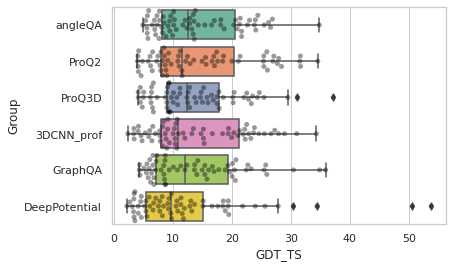

In [38]:
import seaborn as sns
sns.set(style='whitegrid')
single_mqas_df = mqas_df.groupby('Group').filter(lambda x: x.name in group)
sns.boxplot(data=single_mqas_df, y='Group', x='GDT_TS', orient='h', palette="Set2")
sns.swarmplot(data=single_mqas_df, y='Group', x='GDT_TS', color='black', alpha=0.4, orient='h')

In [43]:
len(mqas_df.groupby('target'))

66

In [44]:
[target for target, _ in mqas_df.groupby('target')]

['T1024',
 'T1025',
 'T1026',
 'T1028',
 'T1029',
 'T1030',
 'T1031',
 'T1032',
 'T1033',
 'T1034',
 'T1035',
 'T1036s1',
 'T1037',
 'T1038',
 'T1039',
 'T1040',
 'T1041',
 'T1042',
 'T1043',
 'T1045s1',
 'T1045s2',
 'T1046s1',
 'T1046s2',
 'T1047s1',
 'T1047s2',
 'T1049',
 'T1050',
 'T1052',
 'T1053',
 'T1054',
 'T1055',
 'T1056',
 'T1057',
 'T1058',
 'T1060s2',
 'T1060s3',
 'T1061',
 'T1064',
 'T1065s1',
 'T1065s2',
 'T1067',
 'T1068',
 'T1070',
 'T1073',
 'T1074',
 'T1076',
 'T1078',
 'T1079',
 'T1080',
 'T1082',
 'T1083',
 'T1084',
 'T1085',
 'T1086',
 'T1087',
 'T1089',
 'T1090',
 'T1091',
 'T1092',
 'T1093',
 'T1094',
 'T1095',
 'T1096',
 'T1099',
 'T1100',
 'T1101']

In [45]:
mqas_df.groupby('Group').get_group('3DCNN_prof')

,#,Group,Model,GDT_TS,LDDT,CAD(AA),SG,target
32,33,3DCNN_prof,T1024QA074_2,8.963,4.089,3.363,21.937,T1024
33,34,3DCNN_prof,T1025QA074_2,8.223,18.462,18.599,3.551,T1025
63,64,3DCNN_prof,T1026QA074_2,34.348,28.569,35.297,29.371,T1026
37,38,3DCNN_prof,T1028QA074_2,15.177,6.408,6.307,13.048,T1028
41,42,3DCNN_prof,T1029QA074_2,23.214,21.353,16.055,13.615,T1029
...,...,...,...,...,...,...,...,...
29,30,3DCNN_prof,T1095QA074_2,9.404,15.654,26.277,26.531,T1095
20,21,3DCNN_prof,T1096QA074_2,9.143,15.187,27.953,30.659,T1096
62,63,3DCNN_prof,T1099QA074_2,23.820,31.287,41.147,42.622,T1099
13,14,3DCNN_prof,T1100QA074_2,6.072,5.797,13.903,22.712,T1100
